<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2018-12-10 05:16:55--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2018-12-10 05:16:55 (12.4 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object 

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following packages will be UPDATED:

    seaborn: 0.8.0-py35h15a2772_0 --> 0.9.0-py35_0 anaconda

seaborn-0.9.0- 100% |################################| Time: 0:00:00  50.56 MB/s


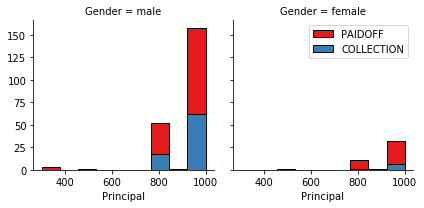

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

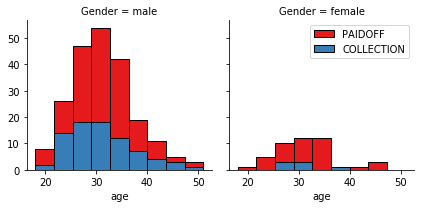

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


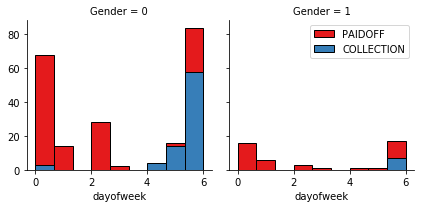

In [48]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()



We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [17]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [18]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [19]:

X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([ 0.67142857,  0.65714286,  0.71428571,  0.68571429,  0.75714286,
        0.71428571,  0.78571429,  0.75714286,  0.75714286])

In [35]:
k = mean_acc.argmax()+1 
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
yhat[0:5]
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 


Train set Accuracy:  0.807971014493
Test set Accuracy:  0.785714285714
The best accuracy was with 0.785714285714 with k= 7


# Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

#train the decision tree
X_traindt, X_testdt, y_traindt, y_testdt = train_test_split(X, y, test_size=0.3, random_state=3)

criterion_types = ['gini', 'entropy']
top_score = 0
best_depth = 0
best_criterion = ''
for depth in range(1,20):
    for criterion in criterion_types:
        dTree = DecisionTreeClassifier(criterion = criterion, max_depth = depth)
        print('At depth = {} and criterion = {}'.format(depth, criterion))
        dTree.fit(X_traindt,y_traindt)
        yhatdt = dTree.predict(X_testdt)
        accuracy_score = metrics.accuracy_score(y_testdt, yhatdt)
    #     print (yhatdt [0:10])
    #     print (y_testdt [0:10])
        print("DecisionTrees's Accuracy: ", accuracy_score)
        print('\n')

        if(accuracy_score > top_score):
            top_score = accuracy_score
            best_depth = depth
            best_criterion = criterion
print("Best depth is {} with criterion {}: accuracy score of {}".format(best_depth, criterion, top_score))

At depth = 1 and criterion = gini
DecisionTrees's Accuracy:  0.740384615385


At depth = 1 and criterion = entropy
DecisionTrees's Accuracy:  0.740384615385


At depth = 2 and criterion = gini
DecisionTrees's Accuracy:  0.663461538462


At depth = 2 and criterion = entropy
DecisionTrees's Accuracy:  0.740384615385


At depth = 3 and criterion = gini
DecisionTrees's Accuracy:  0.663461538462


At depth = 3 and criterion = entropy
DecisionTrees's Accuracy:  0.673076923077


At depth = 4 and criterion = gini
DecisionTrees's Accuracy:  0.682692307692


At depth = 4 and criterion = entropy
DecisionTrees's Accuracy:  0.653846153846


At depth = 5 and criterion = gini
DecisionTrees's Accuracy:  0.682692307692


At depth = 5 and criterion = entropy
DecisionTrees's Accuracy:  0.682692307692


At depth = 6 and criterion = gini
DecisionTrees's Accuracy:  0.653846153846


At depth = 6 and criterion = entropy
DecisionTrees's Accuracy:  0.701923076923


At depth = 7 and criterion = gini
DecisionTree

In [60]:
dTree = DecisionTreeClassifier(criterion = best_criterion, max_depth = best_depth).fit(X_traindt,y_traindt)

In [37]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", top_score)

DecisionTrees's Accuracy:  0.740384615385


# Support Vector Machine

In [38]:
from sklearn import svm
X_trainSVM, X_testSVM, y_trainSVM, y_testSVM = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_trainSVM.shape,  y_trainSVM.shape)
print ('Test set:', X_testSVM.shape,  y_testSVM.shape)


Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [27]:
kernel_types = ['linear', 'poly', 'rbf','sigmoid']
top_scoresvm = 0
best_c_value = 0
best_kernel = ''
for c_value in range(1,5):
    for kernel in kernel_types:
        clf = svm.SVC(kernel=kernel, C = c_value)
        print('At c_value = {} and kernel = {}'.format(c_value, kernel))
        clf.fit(X_trainSVM, y_trainSVM)
        yhatSVM = clf.predict(X_testSVM)
        accuracy_scoresvm = metrics.accuracy_score(y_testSVM, yhatSVM)

        print("SVM's Accuracy: ", accuracy_scoresvm)
        print('\n')

        if(accuracy_scoresvm > top_scoresvm):
            top_scoresvm = accuracy_scoresvm
            best_c_value = c_value
            best_kernel = kernel
print("Best c_value is {} with kernel {}: accuracy score of {}".format(c_value, kernel, top_scoresvm))

At c_value = 1 and kernel = linear
SVM's Accuracy:  0.785714285714


At c_value = 1 and kernel = poly
SVM's Accuracy:  0.771428571429


At c_value = 1 and kernel = rbf
SVM's Accuracy:  0.742857142857


At c_value = 1 and kernel = sigmoid
SVM's Accuracy:  0.742857142857


At c_value = 2 and kernel = linear
SVM's Accuracy:  0.785714285714


At c_value = 2 and kernel = poly
SVM's Accuracy:  0.742857142857


At c_value = 2 and kernel = rbf
SVM's Accuracy:  0.671428571429


At c_value = 2 and kernel = sigmoid
SVM's Accuracy:  0.714285714286


At c_value = 3 and kernel = linear
SVM's Accuracy:  0.785714285714


At c_value = 3 and kernel = poly
SVM's Accuracy:  0.714285714286


At c_value = 3 and kernel = rbf
SVM's Accuracy:  0.671428571429


At c_value = 3 and kernel = sigmoid
SVM's Accuracy:  0.7


At c_value = 4 and kernel = linear
SVM's Accuracy:  0.785714285714


At c_value = 4 and kernel = poly
SVM's Accuracy:  0.685714285714


At c_value = 4 and kernel = rbf
SVM's Accuracy:  0.65714285

In [63]:
clf_svm = svm.SVC(kernel=best_kernel, C = best_c_value).fit(X_trainSVM, y_trainSVM)

# Logistic Regression

In [39]:
X_trainLR, X_testLR, y_trainLR, y_testLR = train_test_split( X, y, test_size=0.2, random_state=4)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='newton-cg').fit(X_trainLR,y_trainLR)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
solver_types = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
top_scoreLR = 0
best_c_valueLR = 0
best_solver = ''
c_valueLR = 0.05
# for c_valueLR in range(0.05, 5, 0.05):
while c_valueLR < 5:
    for solver in solver_types:
        LR = LogisticRegression(C=c_valueLR, solver= solver).fit(X_trainLR,y_trainLR)
#         print('At c_value = {} and solver = {}'.format(c_valueLR, solver))
        yhatLR = LR.predict(X_testLR)
        accuracy_scoreLR = metrics.accuracy_score(y_testLR, yhatLR)
#         print(accuracy_scoreLR)

        if(accuracy_scoreLR > top_scoreLR):
            top_scoreLR = accuracy_scoreLR
            best_c_valueLR = c_valueLR
            best_solver = solver
    c_valueLR = c_valueLR + 0.05
print("Best c_value is {} with best solver {}: accuracy score of {}".format(best_c_valueLR, best_solver, top_scoreLR))

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Best c_value is 0.05 with best solver newton-cg: accuracy score of 0.7857142857142857


In [67]:
LR = LogisticRegression(C=best_c_valueLR, solver= best_solver).fit(X_trainLR,y_trainLR)

# Model Evaluation using Test set

In [72]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [43]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2018-12-10 05:41:09--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2018-12-10 05:41:09 (594 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [50]:
test_df = pd.read_csv('loan_test.csv')
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [52]:
Feature2 = test_df[['Principal','terms','age','Gender','weekend']]
Feature2 = pd.concat([Feature2,pd.get_dummies(test_df['education'])], axis=1)
Feature2.drop(['Master or Above'], axis = 1,inplace=True)
Feature2.head()

X2 = Feature2
X2[0:5]

y2 = test_df['loan_status'].values
y2[0:5]
X2= preprocessing.StandardScaler().fit(X2).transform(X2)
X2[0:5]


yhatdt2 = dTree.predict(X2)
accuracy_scoredt2 = metrics.accuracy_score(y2, yhatdt2)
print (accuracy_scoredt2)

0.666666666667


In [68]:
yhat = neigh.predict(X2)

yhatdt = dTree.predict(X2)

yhatsvm = clf_svm.predict(X2)

yhatLR = LR.predict(X2)

In [71]:
print("Jaccard score for KNN: %.4f" % jaccard_similarity_score(y2, yhat))
print("Jaccard score for Decision Tree: %.4f" % jaccard_similarity_score(y2, yhatdt))
print("Jaccard score for Support Vector Machine: %.4f" % jaccard_similarity_score(y2, yhatsvm))
print("Jaccard score for Logistic Regression: %.4f" % jaccard_similarity_score(y2, yhatLR))

Jaccard score for KNN: 0.6667
Jaccard score for Decision Tree: 0.7407
Jaccard score for Support Vector Machine: 0.7407
Jaccard score for Logistic Regression: 0.7593


In [69]:
print("Avg F1-score for KNN: %.4f" % f1_score(y2, yhat, average='weighted'))
print("Avg F1-score for Decision Tree: %.4f" % f1_score(y2, yhatdt, average='weighted'))
print("Avg F1-score for Support Vector Machine: %.4f" % f1_score(y2, yhatsvm, average='weighted'))
print("Avg F1-score for Logistic Regression: %.4f" % f1_score(y2, yhatLR, average='weighted'))

Avg F1-score for KNN: 0.6328
Avg F1-score for Decision Tree: 0.6304
Avg F1-score for Support Vector Machine: 0.6304
Avg F1-score for Logistic Regression: 0.6718


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [75]:
yhat_prob2LR = LR.predict_proba(X2)
print("Log Loss for Logistic Regression: %.4f" % log_loss(y2, yhat_prob2LR))

Log Loss for Logistic Regression: 0.4786


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | .6667       | .6328        | NA      |
| Decision Tree      | .7407       | .6304       | NA      |
| SVM                | .7407       | .6304        | NA      |
| LogisticRegression | .7593       | .6718        | .4786       |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>